### Import Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import drive

drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!ls "/content/drive/My Drive/Colab Notebooks/Pre-trained data"

glove.6B.100d.txt  my_model   test.csv	       train.csv
glove.6B.200d.txt  my_model1  test_labels.csv
glove.6B.50d.txt   my_model2  test_result.csv


### Loading Data

In [ ]:
my_file = "/content/drive/My Drive/Colab Notebooks/Pre-trained data/"
train_df = pd.read_csv(my_file + 'train.csv').fillna(' ')

# Here is a sample of the data
train_df.sample(10, random_state = 1234)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
12345,20bc45f5014c1eca,"""\n\nYour latest edit has again had to be remo...",0,0,0,0,0,0
55587,948580166b8b8745,"""\n\nWorks for me. BaStun not BaTsun """,0,0,0,0,0,0
16877,2c8519885db5c0bb,List of newspapers in India by readership\n\nT...,0,0,0,0,0,0
140039,ed64d530a34aa973,Happy New Years\nCheers ),0,0,0,0,0,0
125777,a0dd897eafbada2c,Photos \nSouthwestern’s official website has m...,0,0,0,0,0,0
159512,ff2f5695bb9aa845,"How's this? It's a lot shorter, but it's more ...",0,0,0,0,0,0
121612,8aa46e67645e4b7b,Why did you remove skinwalker instead of movin...,0,0,0,0,0,0
7588,142d9e745d03c9ef,"""I repeat, the text was about a minority schoo...",0,0,0,0,0,0
9463,191a1c6bd40ad470,bay pigs article \n\nhi i noticed that you wer...,1,0,1,0,0,0
103236,287b2d375ed7188a,"MusikAnimal is a liar, a disinformant and plag...",0,0,0,0,0,0


In [ ]:
# Show the comments
x = train_df['comment_text'].values
print(x)

["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"
 "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"
 "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info."
 ...
 'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.'
 'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.'
 '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of community goes ""you have bad ideas"" go away, instead o

In [ ]:
# View 10 random toxic comments
train_df.loc[train_df['toxic'] == 1].sample(10, random_state=1234)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
86296,e6cfe09510b15145,and are Angelique KKKarrington-hating Jews!]],1,0,0,0,0,0
8619,16e110672dde00d9,How civil is this - who the fuck do you think ...,1,1,1,0,1,0
123695,958e4d243a743156,"""\n\n idiot \n\n i do not understand what use...",1,0,1,0,1,0
120058,820861d281284864,"""::I'd hoped for a better, more neutral respon...",1,0,0,0,0,0
157801,e381fcf1759b1d0f,"""\n\nComments from the west are irrelevant, we...",1,0,0,0,0,0
132607,c57242ec5816d21c,"""\n\nYOUR MOM IS SO FAT, SHE GETS CASHBACK WHE...",1,1,1,0,1,1
73811,c580d59f2a359dcc,"[User talk:JesseRafe|talk]], How dare you call...",1,0,0,0,1,0
17995,2f85b9f5219235df,"to be honest with you, if you don't tell me a ...",1,0,0,0,0,0
45799,7a675e86c2e62890,"P.S. I need some penis, cat tongue is getting old",1,0,1,0,0,0
148162,47cf25a86ba2dc49,FUCK ALL MODERNISTS \n\nI WISH THE ROMAN EMPIR...,1,0,1,0,0,0


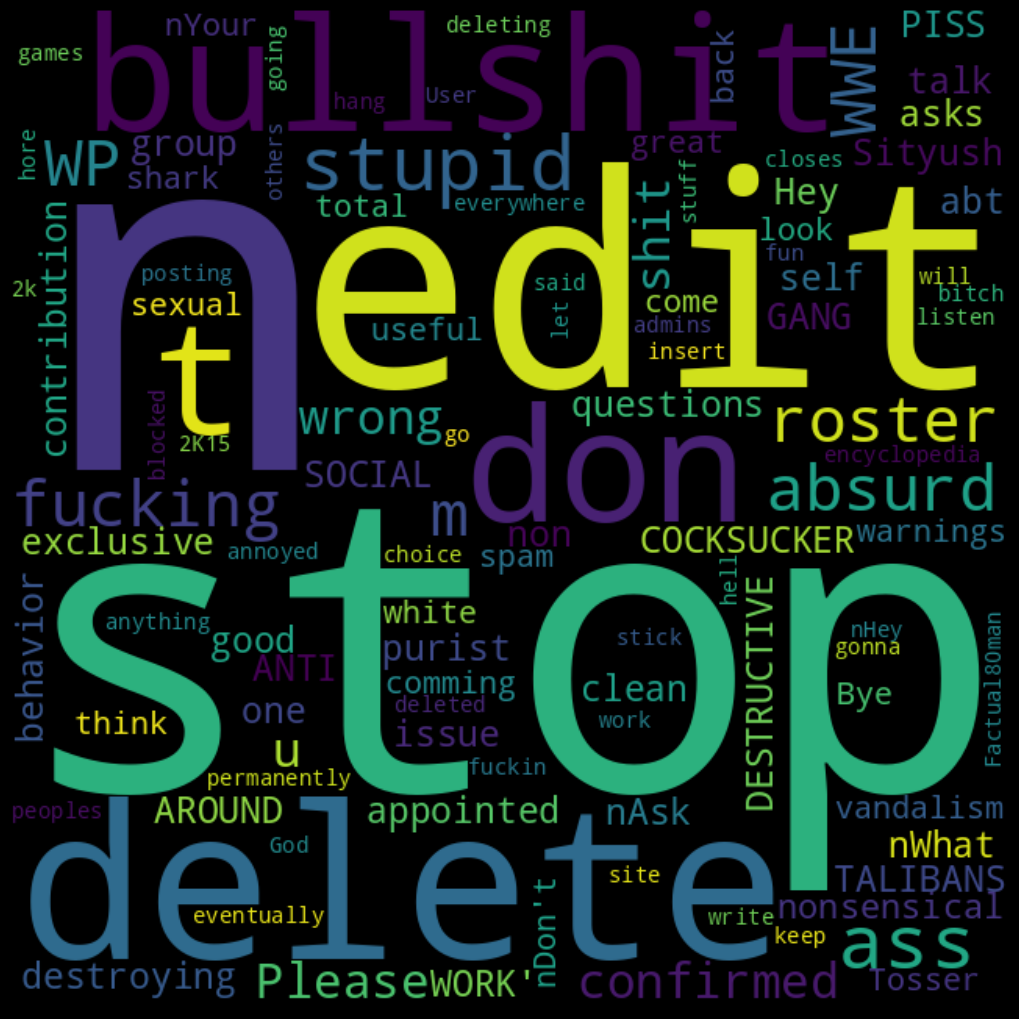

In [ ]:
# Create and generate a WordCloud image with toxic comments
comments = train_df['comment_text'].loc[train_df['toxic']==1].values
wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(comments))

# Display the generated image
fig = plt.figure(
    figsize = (15, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
y = train_df['toxic'].values
print(y)

[0 0 0 ... 0 0 0]


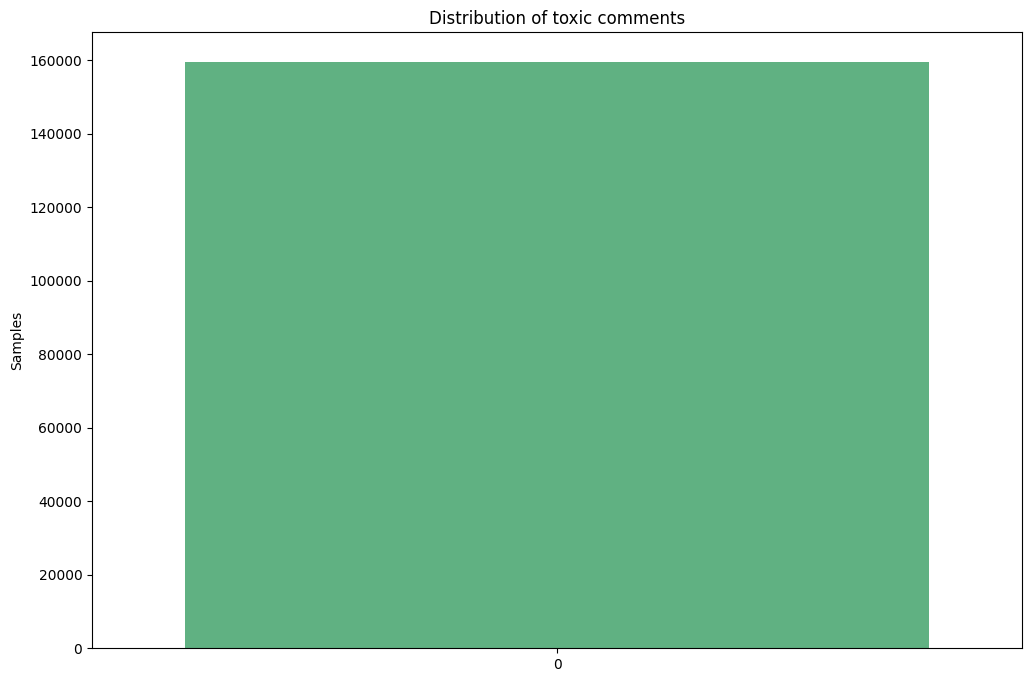

In [ ]:
# Plot frequency of toxic comments (0 = not toxic, 1 = toxic)
green = '#52BE80'
red = '#EC7063'

plt.figure(figsize=(12,8))
ax = sns.countplot(train_df['toxic'], palette=[green, red])
ax.set_title('Distribution of toxic comments')
ax.set_ylabel('Samples');

In [ ]:
# Counts of comments (0 = not toxic, 1 = toxic)
train_df['toxic'].value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

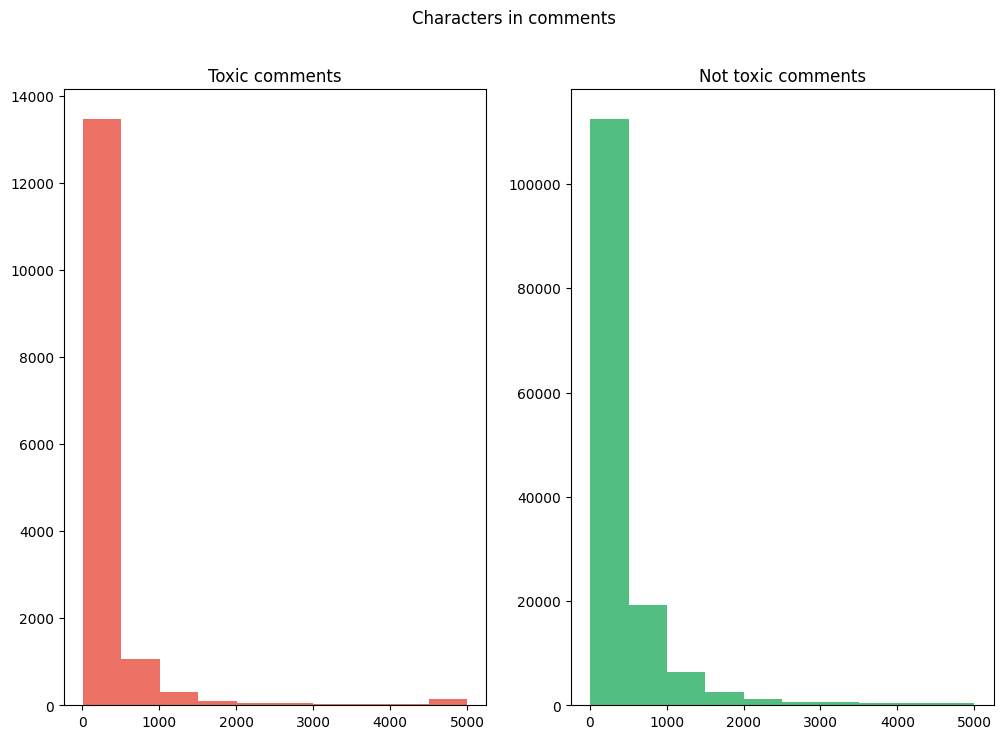

In [ ]:
# Number of carachters in comments
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
comment_len=train_df[train_df['toxic']==1]['comment_text'].str.len()
ax1.hist(comment_len,color=red)
ax1.set_title('Toxic comments')

comment_len=train_df[train_df['toxic']==0]['comment_text'].str.len()
ax2.hist(comment_len,color=green)
ax2.set_title('Not toxic comments')
fig.suptitle('Characters in comments')
plt.show()

The distribution of both seems to be almost same. Until 500 characters in a comment are the most common among both.

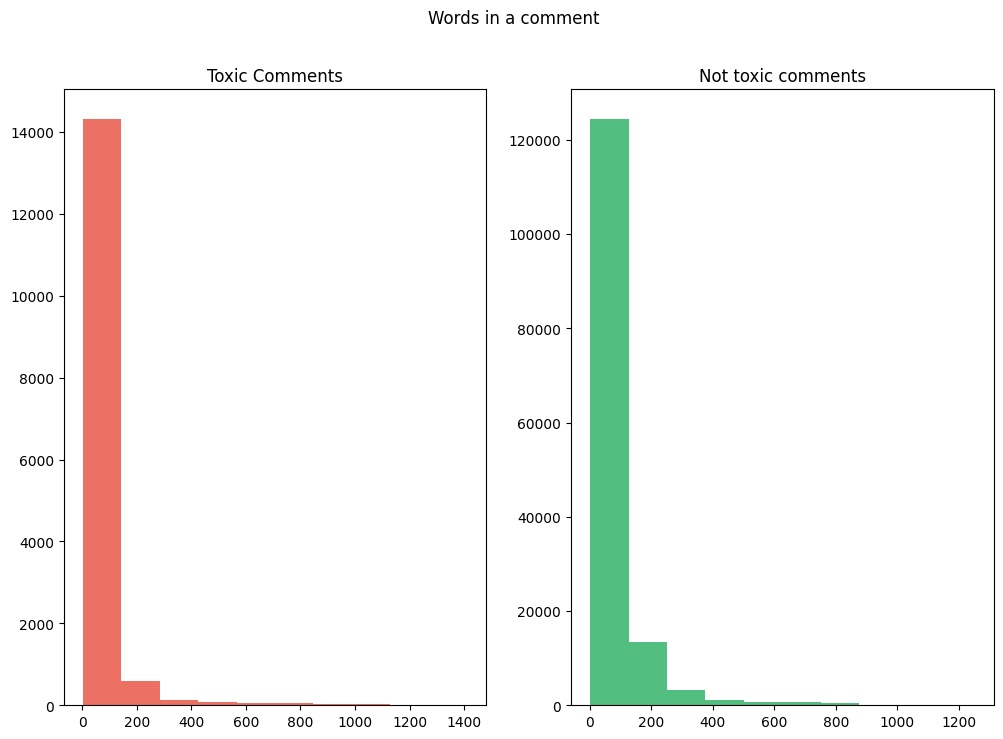

In [ ]:
# Number of words in a comment
fig,(ax1,ax2)=plt.subplots(1,2,figsize = (12,8))
comment_len=train_df[train_df['toxic']==1]['comment_text'].str.split().map(lambda x: len(x))
ax1.hist(comment_len,color = red)
ax1.set_title('Toxic Comments')

comment_len=train_df[train_df['toxic']==0]['comment_text'].str.split().map(lambda x: len(x))
ax2.hist(comment_len,color = green)
ax2.set_title('Not toxic comments')
fig.suptitle('Words in a comment')
plt.show()

### Tokenization and Text Data Preparation

In [ ]:
# Define some hyperparameters for performing tokenization
max_features = 20000
max_text_length = 100

x_tokenizer = text.Tokenizer(max_features)
x_tokenizer.fit_on_texts(list(x))
x_tokenized = x_tokenizer.texts_to_sequences(x)
x_train_val = sequence.pad_sequences(x_tokenized, maxlen = max_text_length)

In [ ]:
embedding_dim = 100
embeddings_index = dict()

f = open(my_file + '/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((max_features, embedding_dim))
for word, index in x_tokenizer.word_index.items():
    if index > max_features -1:
        break
    else:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [ ]:
# Here is what the word embedding for the word 'stop' looks like
embeddings_index.get('stop')

array([ 0.2425   , -0.47787  , -0.13228  , -0.067827 ,  0.18656  ,
        0.50566  , -0.6272   ,  0.62262  ,  0.46563  , -0.2013   ,
        0.10606  , -0.0074248,  0.018328 ,  0.071007 , -0.10155  ,
        0.047794 , -0.23775  , -0.031302 , -0.49632  ,  0.15608  ,
        0.66928  ,  0.25275  , -0.13324  , -0.38499  ,  0.066809 ,
        0.77926  , -0.60947  , -0.2793   ,  0.89159  , -0.014682 ,
       -0.47358  ,  0.46668  ,  0.27529  ,  0.22201  , -0.28549  ,
       -0.32237  , -0.016588 , -0.75657  ,  0.57294  ,  0.019744 ,
       -0.70022  ,  0.21178  , -0.051869 , -0.38181  , -0.059082 ,
        0.31623  ,  0.11617  , -0.50781  , -0.23866  , -0.83731  ,
        0.4407   ,  0.3665   , -0.29323  ,  1.1963   , -0.10997  ,
       -2.1168   , -0.20417  ,  0.094542 ,  1.9624   , -0.057167 ,
       -0.3005   , -0.17937  ,  0.24791  ,  0.0021858,  0.68972  ,
        0.59606  ,  0.46632  ,  0.35762  , -0.42129  , -0.32616  ,
       -0.50294  , -1.0584   , -0.40357  , -0.71748  ,  0.0178

### Create the Embedding Layer

In [ ]:
model = Sequential()
model.add(Embedding(max_features, embedding_dim,
                    embeddings_initializer=tf.keras.initializers.Constant(
                    embedding_matrix), trainable=False))
model.add(Dropout(0.2))

### Build the Model

In [ ]:
# Define parameters
# 1 filters = 150, hidden_dims = 150
# 2 filter = 30, hidden_dims = 30
import matplotlib.pyplot as plt
filters = 50
kernel_size = 10
hidden_dims = 100

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         2000000   
                                                                 
 dropout_4 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_3 (Conv1D)           (None, None, 50)          50050     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, None, 50)         0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, None, 50)          25050     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, None, 50)         0         
 1D)                                                  

None

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 12.6 µs
Epoch 1/20
1746/1746 [==============================] - 170s 97ms/step - loss: 0.2026 - accuracy: 0.9279 - val_loss: 0.1567 - val_accuracy: 0.9441
Epoch 2/20
1746/1746 [==============================] - 165s 95ms/step - loss: 0.1591 - accuracy: 0.9437 - val_loss: 0.1580 - val_accuracy: 0.9395
Epoch 3/20
1746/1746 [==============================] - 165s 94ms/step - loss: 0.1476 - accuracy: 0.9474 - val_loss: 0.1444 - val_accuracy: 0.9469
Epoch 4/20
1746/1746 [==============================] - 167s 96ms/step - loss: 0.1420 - accuracy: 0.9495 - val_loss: 0.1444 - val_accuracy: 0.9473
Epoch 5/20
1746/1746 [==============================] - 167s 96ms/step - loss: 0.1363 - accuracy: 0.9520 - val_loss: 0.1454 - val_accuracy: 0.9452
Epoch 6/20
1746/1746 [==============================] - 163s 94ms/step - loss: 0.1332 - accuracy: 0.9530 - val_loss: 0.1505 - val_accuracy: 0.9485
Epoch 7/20
1746/1746 [==============================] 

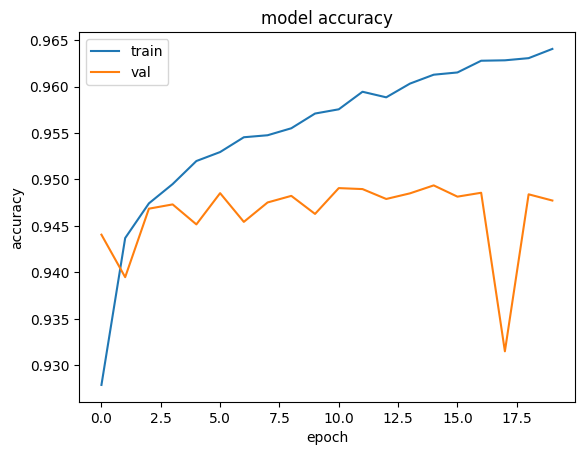

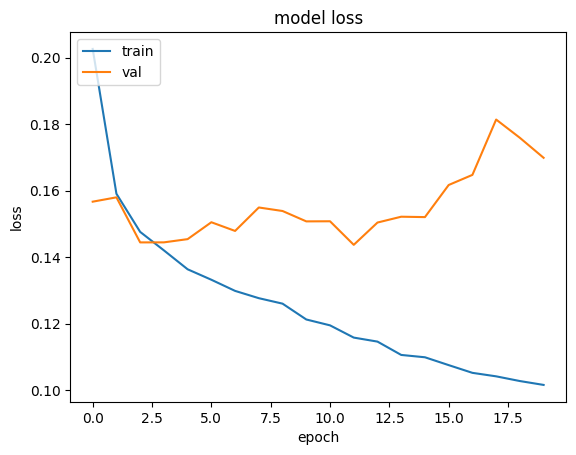

In [ ]:
# First
model = Sequential()
model.add(Embedding(max_features, embedding_dim,
                    embeddings_initializer=tf.keras.initializers.Constant(
                    embedding_matrix), trainable=False))
model.add(Dropout(0.2))

model.add(Conv1D(filters, kernel_size, activation = 'relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters, kernel_size, activation = 'relu'))
model.add(MaxPooling1D())
model.add(Conv1D(filters, kernel_size, activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, input_shape=(100,), activation = 'sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

# Display the model structure
display(model.summary())

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Train the model, iterating on the data in batches of 64 samples
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y, test_size = 0.30, random_state = 1235)

%time
batch_size = 64
epochs = 20

history = model.fit(x_train, y_train, batch_size = batch_size,
          epochs = epochs, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

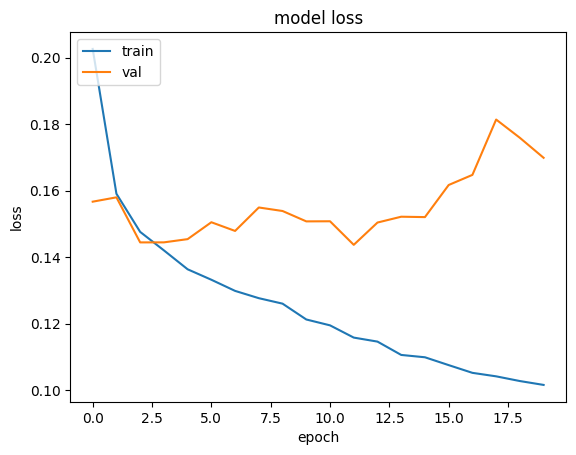

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         2000000   
                                                                 
 dropout_3 (Dropout)         (None, None, 100)         0         
                                                                 
 global_max_pooling1d_1 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 12)                1212      
                                                                 
 dense_4 (Dense)             (None, 4)                 52        
                                                      

None

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 10.3 µs
Epoch 1/20
1746/1746 [==============================] - 30s 16ms/step - loss: 0.3517 - accuracy: 0.8981 - val_loss: 0.3160 - val_accuracy: 0.9040
Epoch 2/20
1746/1746 [==============================] - 27s 16ms/step - loss: 0.2869 - accuracy: 0.9065 - val_loss: 0.2286 - val_accuracy: 0.9040
Epoch 3/20
1746/1746 [==============================] - 27s 16ms/step - loss: 0.2344 - accuracy: 0.9160 - val_loss: 0.2157 - val_accuracy: 0.9206
Epoch 4/20
1746/1746 [==============================] - 28s 16ms/step - loss: 0.2279 - accuracy: 0.9166 - val_loss: 0.2158 - val_accuracy: 0.9268
Epoch 5/20
1746/1746 [==============================] - 26s 15ms/step - loss: 0.2253 - accuracy: 0.9170 - val_loss: 0.2098 - val_accuracy: 0.9255
Epoch 6/20
1746/1746 [==============================] - 25s 14ms/step - loss: 0.2233 - accuracy: 0.9188 - val_loss: 0.2100 - val_accuracy: 0.9234
Epoch 7/20
1746/1746 [==============================] - 26s 

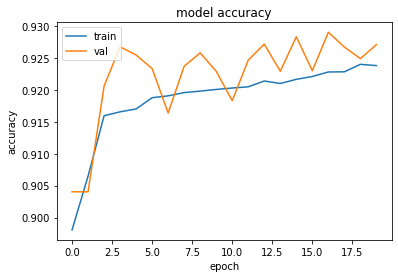

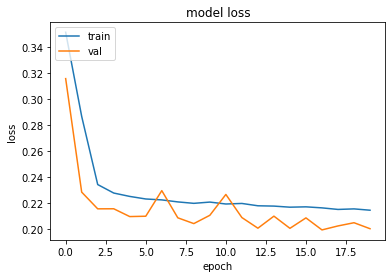

In [ ]:
# Second

model = Sequential()
model.add(Embedding(max_features, embedding_dim,
                    embeddings_initializer=tf.keras.initializers.Constant(
                    embedding_matrix), trainable=False))
model.add(Dropout(0.2))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation = 'sigmoid'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(4, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

# Display the model structure
display(model.summary())

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Train the model, iterating on the data in batches of 64 samples
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y, test_size = 0.30, random_state = 1235)

%time
batch_size = 64
epochs = 20

history = model.fit(x_train, y_train, batch_size = batch_size,
          epochs = epochs, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         2000000   
                                                                 
 dropout_5 (Dropout)         (None, None, 100)         0         
                                                                 
 global_max_pooling1d_2 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dropout_6 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                      

None

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.15 µs
Epoch 1/20
1746/1746 [==============================] - 29s 16ms/step - loss: 0.2326 - accuracy: 0.9178 - val_loss: 0.2072 - val_accuracy: 0.9249
Epoch 2/20
1746/1746 [==============================] - 27s 16ms/step - loss: 0.2136 - accuracy: 0.9235 - val_loss: 0.2062 - val_accuracy: 0.9249
Epoch 3/20
1746/1746 [==============================] - 26s 15ms/step - loss: 0.2092 - accuracy: 0.9247 - val_loss: 0.2066 - val_accuracy: 0.9278
Epoch 4/20
1746/1746 [==============================] - 28s 16ms/step - loss: 0.2076 - accuracy: 0.9255 - val_loss: 0.1987 - val_accuracy: 0.9281
Epoch 5/20
1746/1746 [==============================] - 26s 15ms/step - loss: 0.2049 - accuracy: 0.9268 - val_loss: 0.2020 - val_accuracy: 0.9267
Epoch 6/20
1746/1746 [==============================] - 27s 15ms/step - loss: 0.2055 - accuracy: 0.9263 - val_loss: 0.2028 - val_accuracy: 0.9289
Epoch 7/20
1746/1746 [==============================] - 27s 

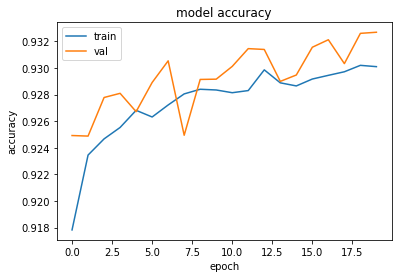

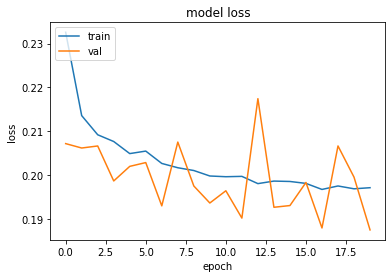

In [ ]:
# Third

# Second

model = Sequential()
model.add(Embedding(max_features, embedding_dim,
                    embeddings_initializer=tf.keras.initializers.Constant(
                    embedding_matrix), trainable=False))
model.add(Dropout(0.2))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation = 'relu'))
# model.add(Dense(12, activation = 'relu'))
# model.add(Dense(4, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

# Display the model structure
display(model.summary())

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Train the model, iterating on the data in batches of 64 samples
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y, test_size = 0.30, random_state = 1235)

%time
batch_size = 64
epochs = 20
history = model.fit(x_train, y_train, batch_size = batch_size,
          epochs = epochs, validation_data=(x_val, y_val))


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, None, 100)         2000000   
                                                                 
 dropout_7 (Dropout)         (None, None, 100)         0         
                                                                 
 global_max_pooling1d_3 (Glo  (None, 100)              0         
 balMaxPooling1D)                                                
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dropout_8 (Dropout)         (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 101       
                                                      

None

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Epoch 1/20
1746/1746 [==============================] - 27s 15ms/step - loss: 0.2364 - accuracy: 0.9164 - val_loss: 0.2289 - val_accuracy: 0.9157
Epoch 2/20
1746/1746 [==============================] - 28s 16ms/step - loss: 0.2131 - accuracy: 0.9233 - val_loss: 0.2041 - val_accuracy: 0.9248
Epoch 3/20
1746/1746 [==============================] - 27s 16ms/step - loss: 0.2109 - accuracy: 0.9241 - val_loss: 0.2079 - val_accuracy: 0.9277
Epoch 4/20
1746/1746 [==============================] - 24s 14ms/step - loss: 0.2093 - accuracy: 0.9248 - val_loss: 0.2013 - val_accuracy: 0.9279
Epoch 5/20
1746/1746 [==============================] - 25s 14ms/step - loss: 0.2074 - accuracy: 0.9252 - val_loss: 0.2026 - val_accuracy: 0.9270
Epoch 6/20
1746/1746 [==============================] - 25s 14ms/step - loss: 0.2068 - accuracy: 0.9260 - val_loss: 0.2002 - val_accuracy: 0.9281
Epoch 7/20
1746/1746 [==============================] - 27s 1

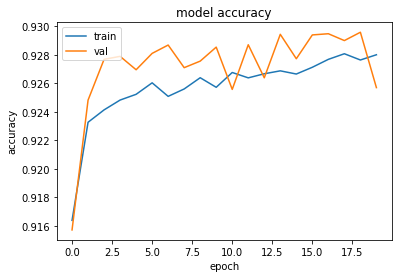

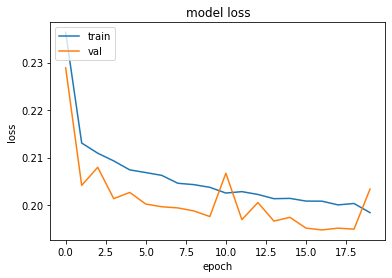

In [ ]:
# Fourth

model = Sequential()
model.add(Embedding(max_features, embedding_dim,
                    embeddings_initializer=tf.keras.initializers.Constant(
                    embedding_matrix), trainable=False))
model.add(Dropout(0.2))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, activation = 'sigmoid'))
# model.add(Dense(12, activation = 'relu'))
# model.add(Dense(4, activation = 'sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(1, activation = 'sigmoid'))

# Display the model structure
display(model.summary())

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Train the model, iterating on the data in batches of 64 samples
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y, test_size = 0.30, random_state = 1235)

%time
batch_size = 64
epochs = 20
history = model.fit(x_train, y_train, batch_size = batch_size,
          epochs = epochs, validation_data=(x_val, y_val))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         2000000   
                                                                 
 dropout_1 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 50)          50050     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 50)         0         
 )                                                               
                                                                 
 spatial_dropout1d (SpatialD  (None, None, 50)         0         
 ropout1D)                                                       
                                                                 
 conv1d_1 (Conv1D)           (None, None, 50)         

None

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs
Epoch 1/20
1746/1746 [==============================] - 181s 103ms/step - loss: 0.5649 - accuracy: 0.9157 - val_loss: 0.2546 - val_accuracy: 0.9337
Epoch 2/20
1746/1746 [==============================] - 157s 90ms/step - loss: 0.2535 - accuracy: 0.9338 - val_loss: 0.2290 - val_accuracy: 0.9407
Epoch 3/20
1746/1746 [==============================] - 158s 91ms/step - loss: 0.2358 - accuracy: 0.9404 - val_loss: 0.2214 - val_accuracy: 0.9462
Epoch 4/20
1746/1746 [==============================] - 159s 91ms/step - loss: 0.2267 - accuracy: 0.9428 - val_loss: 0.2178 - val_accuracy: 0.9464
Epoch 5/20
1746/1746 [==============================] - 158s 90ms/step - loss: 0.2211 - accuracy: 0.9448 - val_loss: 0.2105 - val_accuracy: 0.9475
Epoch 6/20
1746/1746 [==============================] - 164s 94ms/step - loss: 0.2163 - accuracy: 0.9463 - val_loss: 0.2126 - val_accuracy: 0.9470
Epoch 7/20
1746/1746 [==============================]

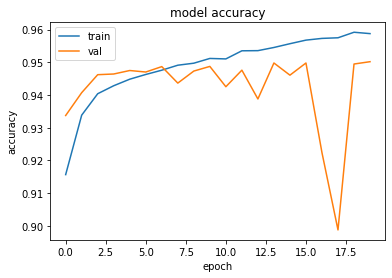

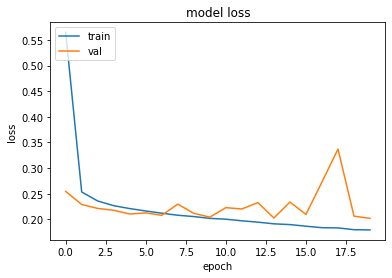

In [ ]:
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.regularizers import L1

model = Sequential()
model.add(Embedding(max_features, embedding_dim,
                    embeddings_initializer=tf.keras.initializers.Constant(
                    embedding_matrix), trainable=False))
model.add(Dropout(0.2))

model.add(Conv1D(filters, kernel_size, activation = 'relu'))
model.add(MaxPooling1D())
model.add(SpatialDropout1D(0))
model.add(Conv1D(filters, kernel_size, activation = 'relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims, input_shape=(100,), activation = 'relu',kernel_regularizer='l2'))
model.add(Dense(hidden_dims, input_shape=(100,), activation = 'sigmoid',kernel_regularizer='l1'))
# model.add(Dense(hidden_dims, input_shape=(100,), activation = 'relu',kernel_regularizer='l1'))

model.add(Dropout(0.2))

model.add(Dense(1, activation = 'sigmoid'))

# Display the model structure
display(model.summary())

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Train the model, iterating on the data in batches of 64 samples
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y, test_size = 0.30, random_state = 1235)

%time
batch_size = 64
epochs = 20
history = model.fit(x_train, y_train, batch_size = batch_size,
          epochs = epochs, validation_data=(x_val, y_val))


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Implementation

In [ ]:
dmodel.save(my_file + 'my_model1')